## Content
- Stacked countplot using seaborn
- Plotting with Pandas

#### Importing and reading our data

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O vgsales.csv

--2023-02-14 04:28:08--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.173, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘vgsales.csv’

vgsales.csv         100%[===================>]   1.95M  7.35MB/s    in 0.3s    

2023-02-14 04:28:09 (7.35 MB/s) - ‘vgsales.csv’ saved [2041483/2041483]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


Now let's filter our data for top 3 pubsliehers, genres and platforms as we did in the lecture

In [ ]:
top3_pub = data['Publisher'].value_counts().index[:3]
top3_gen = data['Genre'].value_counts().index[:3]
top3_plat = data['Platform'].value_counts().index[:3]
top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))]
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


## Stacked Countplot



#### How can we visualize the distribution of genres for top-3 publishers?

We will need publishers on x-axis, and the number of games of each genre on y-axis!




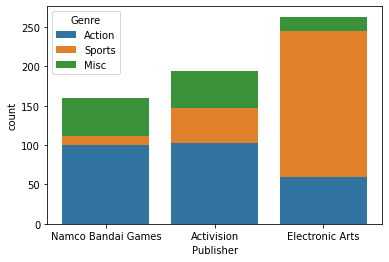

In [ ]:
ax=sns.countplot(x='Publisher',data=top3_data, hue='Genre',dodge=False)
bottoms = {}
for bars in ax.containers:
    for bar in bars:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h
ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
plt.show()

#### Code Explanation:
- We first use `dodge=False` parameter to not form the a dodged countplot
- Now, simply using `dodge=False` will make the position of each bar constant, but won't adjust the heights. 
  - The bars will end up overlapping, hence we need to manually update the heights for for the bars
- We use a `bottoms` dictionary, and for each genre, update the bar's height with the data
- After every updation, we set the height of bar using `bar.set_y`
- Finally we use `ax.relim()` and `ax.autoscale()` to update and scale the bars at the end as per the plot

Do print the data in the bottoms dictionary to get a cleared idea of how this is working!

#### What information can we infer from this stacked countplot?
- Even though EA has highest games, majority of its games are of `Sports` Type
- Comparitively, Action and Misc. type game industry is dominated by Namco and Activision more

## Plotting Using Pandas
We can also do basic plotting with the help of pandas itself.

Let's look at the different types of plots we can do with pandas

#### Downloading our data

We will use a dataset of recent graduate from various colleges for our study

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/007/420/original/recent-grads.csv?1657898246 -O grads.csv

--2023-02-14 04:28:12--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/007/420/original/recent-grads.csv?1657898246
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.173, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26872 (26K) [text/plain]
Saving to: ‘grads.csv’

grads.csv           100%[===================>]  26.24K   144KB/s    in 0.2s    

2023-02-14 04:28:13 (144 KB/s) - ‘grads.csv’ saved [26872/26872]



In [ ]:
import pandas as pd
df = pd.read_csv('grads.csv')
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [ ]:
df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [ ]:
print(df.columns)
print(df.shape)

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')
(173, 21)


#### Line plot
Let's try to plot the rank vs. median income values
- We use df.plot() to create the line chart
- The x axis column value is passed as parameter x
- The y axis column value is passed as parameter y

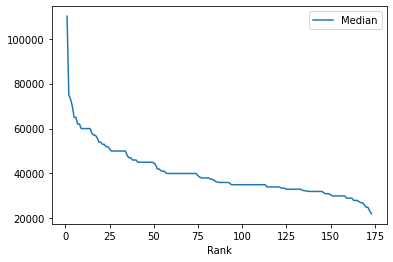

In [ ]:
df.plot(x="Rank", y = "Median")

We can modify the same to include the 25th and 75th percentile values

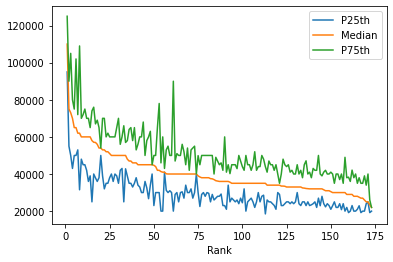

In [ ]:
df.plot(x="Rank", y = ["P25th", "Median", "P75th"])

We can do even more types of plots using the "kind" parameter

By default, the value of kind is "line"

#### Histogram
**How can we see the distribution of the median column?**

We can use a histogram to visualize this.
- Use .plot() on the column to plot
- Define the paramter kind = "hist"

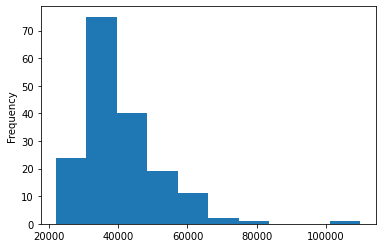

In [ ]:
df['Median'].plot(kind="hist")

#### Barplot

Now suppose we want to see which major category is most popular?

**How can we check this data?**

Maybe we can plot a bar chart to visualize this.

- We use the parameter kind = "bar" for this

In [ ]:
df['Major_category'].plot(kind = 'bar')

TypeError: ignored

**Why did we get this error?**

We need numeric data to create barplot.

**How can we convert our categorical data into numeric?**

We can use value_counts() to get the frequency.

- Use value_counts() for the frequency
- Use .plot() over this to get the barplot

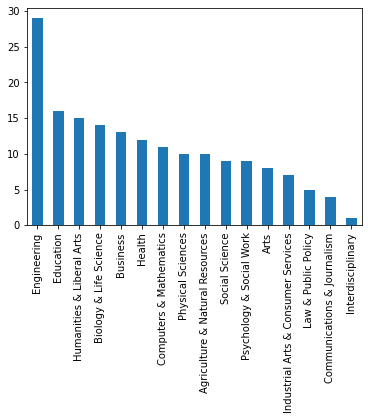

In [ ]:
df['Major_category'].value_counts().plot(kind = 'bar')

We can visualize this bar graph horizontally too using kind = "barh"

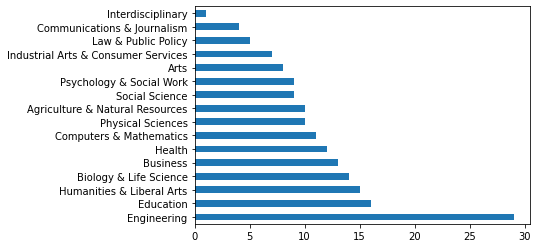

In [ ]:
df['Major_category'].value_counts().plot(kind = 'barh')

We can see though, the data is not sorted properly. 

To get a sorted visuzalization in order to understand the differences between the majors, we can use sort_values()

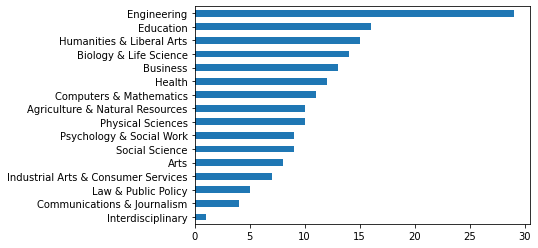

In [ ]:
df['Major_category'].value_counts().sort_values().plot(kind = 'barh')

#### Scatter plot
Now let's say we want to see the general trend between unemployment rate and median income.

**Which type of graph can we use to visualize this?**

A scatter plot would be really useful for this.

- Use DataFrame.plot() 
- Pass the x parameter as "Median"
- Pass the y parameter as "Unemployment_rate"
- Define the kind parameter as "scatter"

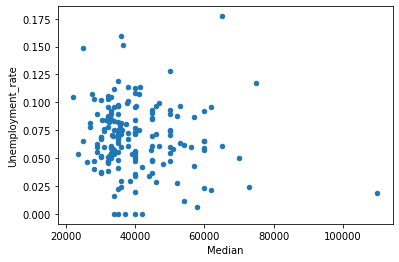

In [ ]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

#### Pie chart
Now let's say we want to see the proportion of each Major

But the number of Majors itself is very huge



In [ ]:
df['Major'].value_counts()

PETROLEUM ENGINEERING                                  1
MATHEMATICS TEACHER EDUCATION                          1
FORESTRY                                               1
SOIL SCIENCE                                           1
GENERAL EDUCATION                                      1
                                                      ..
INTERNATIONAL BUSINESS                                 1
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    1
MOLECULAR BIOLOGY                                      1
MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION        1
LIBRARY SCIENCE                                        1
Name: Major, Length: 173, dtype: int64

**How can we work on this?**

To start with, we can group the Majors as per sum of Total graduates per Major category

In [ ]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()

Now let's try to plot a pie chart based on this data.

- Set parameter kind as "pie"

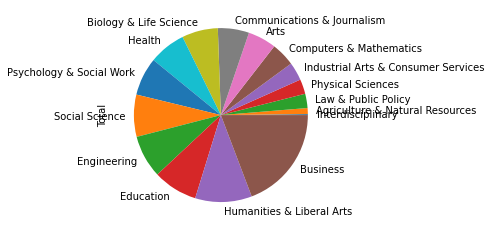

In [ ]:
cat_totals.plot(kind = "pie")

Still majority of the smaller categories are clustered.

To solve this, 

- let's filter out categories with total under 100,000 and above 100,000

In [ ]:
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]

Now let's put all the smaller categories into a "other category".

- We merge this with our bigger categories to prepare the final data for the piechart

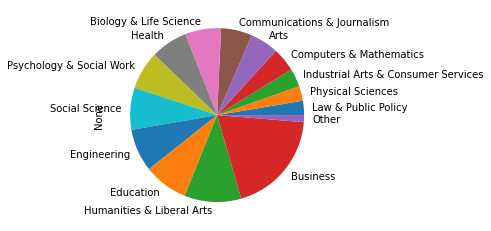

In [ ]:
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie")

This worked great. 

We can see a small issue though, the column name overlapping "Social Science"

To solve this,
- We pass the parameter label = " "

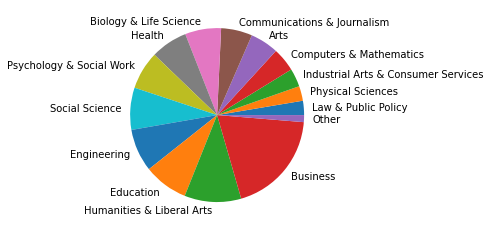

In [ ]:
big_cat_totals.plot(kind="pie", label = " ")

#### KDE

Suppose we want to visualize the distribution of the median values.

**What kind of plot can we use for this?**

Something like KDE plot can be really helpful.
- Index the Median column from the dataframe.
- Just add kind = "kde" as parameter.


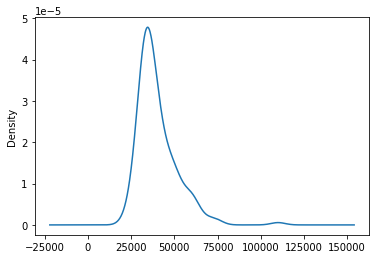

In [ ]:
df['Median'].plot(kind = 'kde')

#### Key Takeaways

- We can use pandas to plot different kind of plots too, using it's inbuilt .plot() function.
- This, combined with Pandas aggregation functions, can be very handy for visualizing data.
- Refer to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html for more info on the various plotting functionalities of pandas.
